INSTALL

In [1]:
!pip install ultralytics opencv-python matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.3 MB/s eta 0:00:00


In [2]:

!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

!pip install ultralytics

Looking in indexes: https://download.pytorch.org/whl/cu118


In [3]:
#Install Ultralytics + dependencies
!pip install ultralytics opencv-python matplotlib --quiet

In [4]:
!apt-get update && apt-get install -y libreoffice


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,927 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,901 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,720

In [5]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 5.2 MB/s eta 0:00:00


google drive

In [15]:
from google.colab import drive

# Mount your Google Drive only once at the beginning of your notebook
# Check if the drive is already mounted
import os
if not os.path.exists('/content/drive'):
  drive.mount('/content/drive')

# Access your data path
data_path = "/content/drive/MyDrive/dataset2/data.yaml"

TRY WITH AN IMAGE- PREDICTION


image 1/1 /content/drive/MyDrive/trial.jpg: 352x640 2 Helmets, 1 Person, 2 Vests, 22.2ms
Speed: 2.2ms preprocess, 22.2ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict9


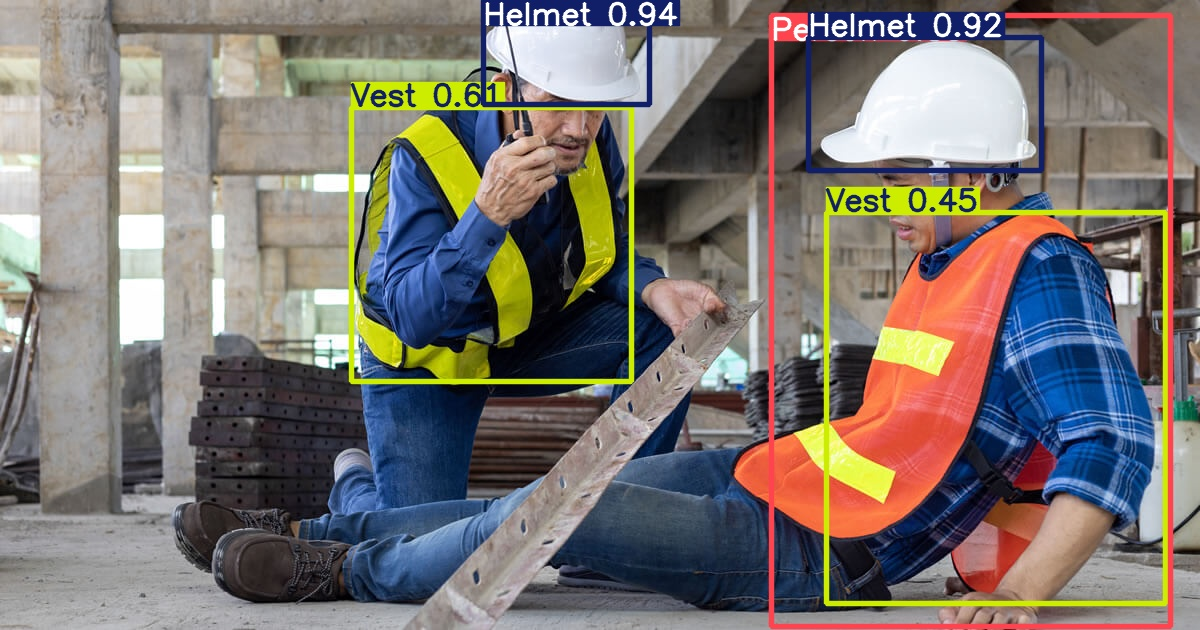

✅ PDF saved to: /content/trial_PPE_Report.pdf


In [28]:
from ultralytics import YOLO
from docx import Document
from docx.shared import Inches
from IPython.display import display, Image as IPImage
import glob, os, shutil, subprocess
from collections import Counter

image_path = "/content/drive/MyDrive/trial.jpg"  # ✅ Set your image path

# ✅ Load model and predict
model = YOLO("/content/drive/MyDrive/yolov10s_models/perfect100.pt")
results = model.predict(source=image_path, conf=0.25, save=True)
save_dir = results[0].save_dir

# ✅ Locate prediction image
pred_img = glob.glob(f"{save_dir}/*.jpg")[0]
image_name = os.path.basename(image_path).split('.')[0]
safe_image_path = f"/content/{image_name}_pred.jpg"
shutil.copy(pred_img, safe_image_path)
display(IPImage(filename=safe_image_path))

# ✅ Extract detection summary
names = model.names  # class index to name
detections = results[0].boxes.cls.tolist()
class_counts = Counter([names[int(c)] for c in detections])



# ✅ List of PPE classes to track
ppe_classes = ["Boots", "Helmet", "Vest", "Glove", "Mask", "Ear-protection", "Glass", "Person"]
ppe_items = [(cls, str(class_counts.get(cls, 0))) for cls in ppe_classes]

# ✅ Build Word Report
docx_path = f"/content/{image_name}_PPE_Report.docx"
pdf_path = f"/content/{image_name}_PPE_Report.pdf"

doc = Document()
doc.add_heading('🛡️ PPE Detection Safety Report', level=1)
doc.add_paragraph(f"Image: {os.path.basename(image_path)}")
doc.add_paragraph("Model: YOLOv10 – Custom-trained")
doc.add_paragraph("Date: May 11, 2025")


# Define your fixed metrics
metrics = [
    ("Precision", "88.7%"),
    ("Recall", "99.2%"),
    ("mAP@0.5", "99.5%"),
    ("mAP@0.5:0.95", "93.8%")
]

# Add the table to the Word document
doc.add_heading('📊 Model Performance Summary', level=2)
table = doc.add_table(rows=len(metrics), cols=2)
table.style = 'Table Grid'

for i, (k, v) in enumerate(metrics):
    table.cell(i, 0).text = k
    table.cell(i, 1).text = v

doc.add_heading('✅ Detected PPE Items', level=2)
table2 = doc.add_table(rows=len(ppe_items), cols=2)
table2.style = 'Table Grid'
for i, (k, v) in enumerate(ppe_items):
    table2.cell(i, 0).text = k
    table2.cell(i, 1).text = v

# ❌ Safety Gaps
missing_items = [cls for cls in ppe_classes if class_counts.get(cls, 0) == 0 and cls != "Person"]
doc.add_heading('❌ Safety Gaps', level=2)
if missing_items:
    doc.add_paragraph("Missing items: " + ", ".join(missing_items))
else:
    doc.add_paragraph("All PPE categories detected.")

doc.add_heading('📁 Visual Evidence', level=2)
doc.add_picture(safe_image_path, width=Inches(5))

# ✅ Save and export
doc.save(docx_path)
subprocess.run(["libreoffice", "--headless", "--convert-to", "pdf", "--outdir", "/content", docx_path])
print(f"✅ PDF saved to: {pdf_path}")


In [27]:
from google.colab import files
files.download(pdf_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>